In [1]:
!pip install -Uqq Pillow
!pip install -Uqq fastbook
!pip install -Uqq timm

from fastai.vision.learner import *
from fastai.vision.all import *
import fastbook
from fastbook import *
import os
from PIL import Image
from IPython.display import display

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def finding(x): return x[0].isupper()

#Defining a DataBlock for processing the images
xrays = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

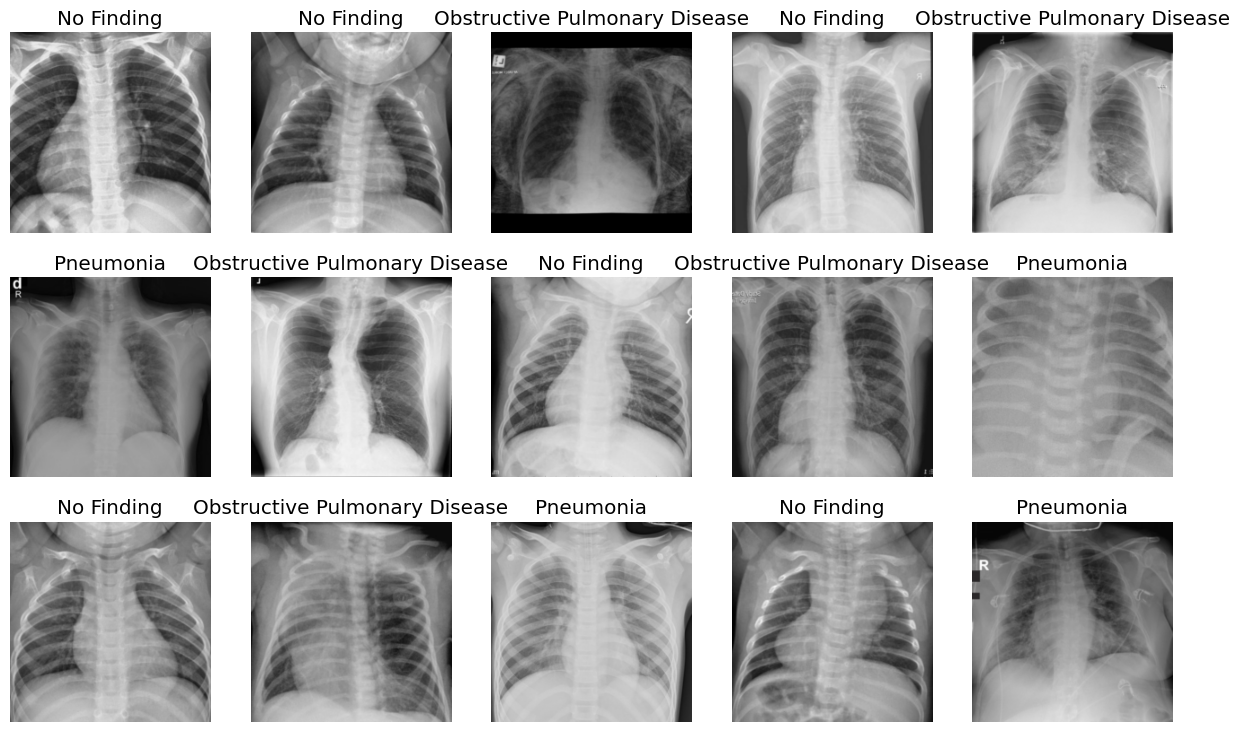

In [3]:
#Creating DataLoaders and displaying a batch of validation set images
path = '/kaggle/input/chest-x-ray-dataset-3-classes/archive'
dls = xrays.dataloaders(path, label_func=finding)
dls.valid.show_batch(max_n=15, nrows=3)

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.884193,0.460427,0.175987,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.336301,0.212136,0.069079,01:26
1,0.255576,0.154193,0.052632,01:26
2,0.179447,0.112346,0.041118,01:26
3,0.132326,0.054427,0.014803,01:26
4,0.094206,0.053960,0.014803,01:26
5,0.063989,0.032663,0.011513,01:26
6,0.040960,0.026096,0.004934,01:26
7,0.031218,0.026548,0.004934,01:26
8,0.021657,0.030137,0.004934,01:26
9,0.015095,0.027772,0.004934,01:26


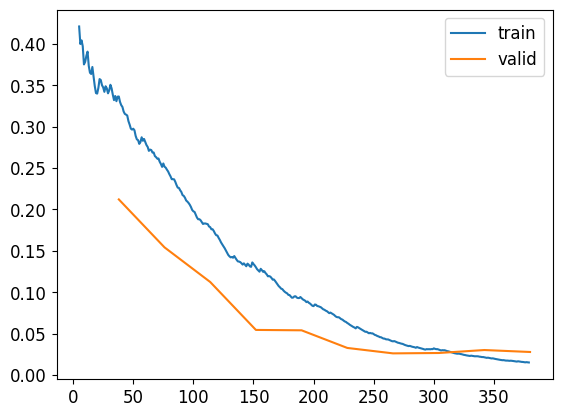

In [4]:
#Define a learner
learn = vision_learner(dls, 'vit_base_patch16_224.orig_in21k', metrics=error_rate, opt_func=Adam)

#Fine-tune the model
learn.fine_tune(epochs=10)
learn.recorder.plot_loss()

In [5]:
learn.export('model.pkl')